In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Stadtwohnung (mit ÖV)
miete_stadt = 1800
abo_oev = 80

# Stadtrandwohnung (mit Auto)
miete_stadtrand = 1300
auto_fix = 500  # Leasing, Versicherung, etc.
auto_variable = 0.2  # CHF/km
pendelstrecke_km = 40  # km pro Tag (Hin- und Zurück)
pendeltage = 220  # Arbeitstage pro Jahr

# Zeitwert (CHF/Stunde)
zeitwert = 25
zeit_pendeln_stadt = 0.5  # Stunden/Tag
zeit_pendeln_stadtrand = 1.5  # Stunden/Tag

# CO2 (kg/km)
co2_auto_km = 0.2
co2_oev_km = 0.03

# Zeitraum
jahre = np.arange(0, 11)
monate = jahre * 12


In [11]:
# Gesamtkosten Stadt
kosten_stadt = (miete_stadt + abo_oev) * 12 * jahre
zeitkosten_stadt = zeit_pendeln_stadt * pendeltage * zeitwert * jahre
co2_stadt = pendelstrecke_km * pendeltage * co2_oev_km * jahre

total_stadt = kosten_stadt + zeitkosten_stadt

# Gesamtkosten Stadtrand
fahrkosten = pendelstrecke_km * pendeltage * auto_variable * jahre
kosten_stadtrand = (miete_stadtrand + auto_fix) * 12 * jahre + fahrkosten
zeitkosten_stadtrand = zeit_pendeln_stadtrand * pendeltage * zeitwert * jahre
co2_stadtrand = pendelstrecke_km * pendeltage * co2_auto_km * jahre

total_stadtrand = kosten_stadtrand + zeitkosten_stadtrand

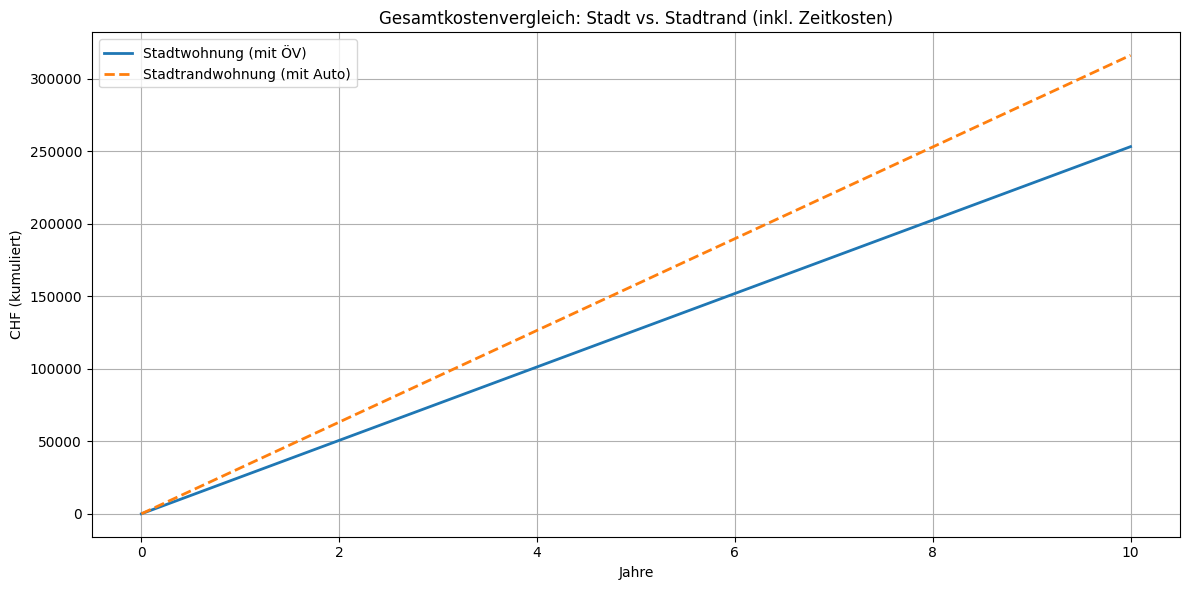

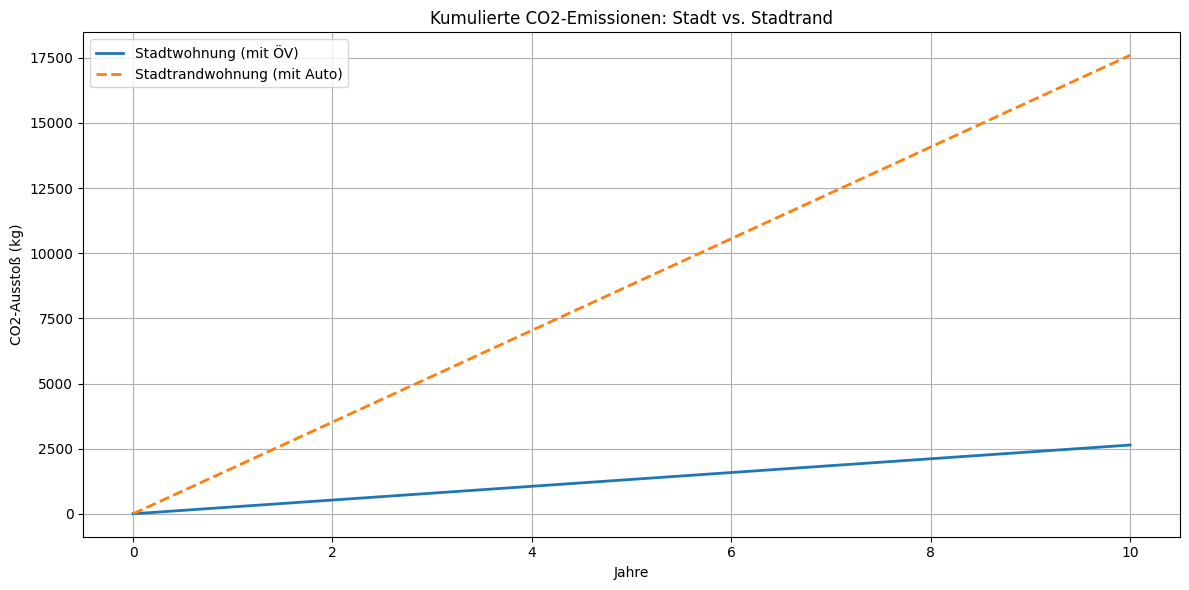

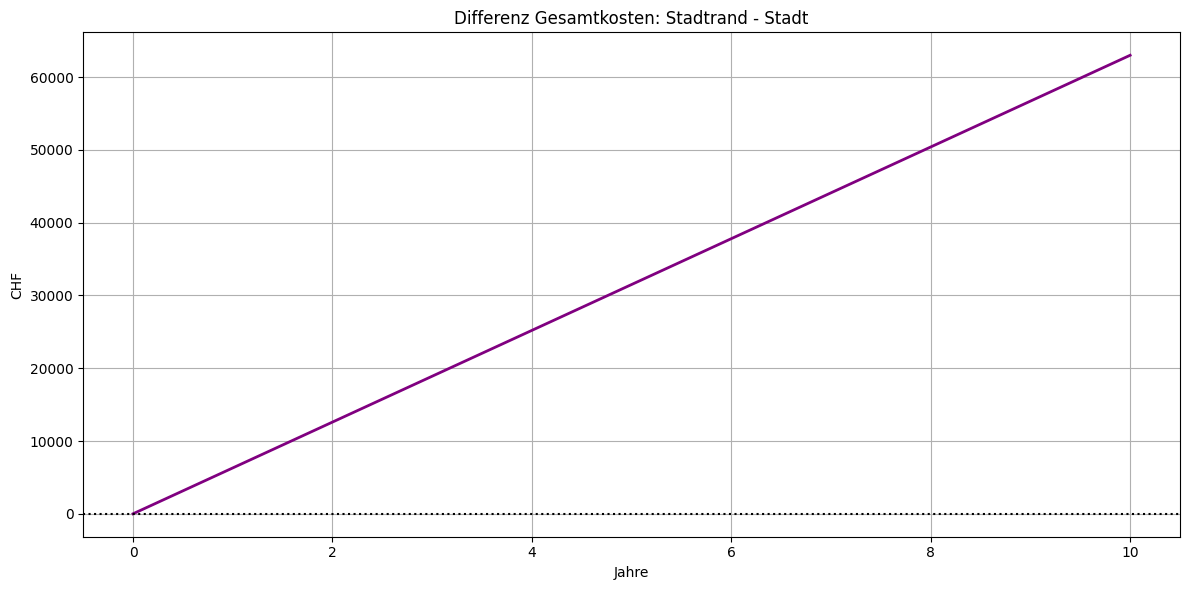

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(jahre, total_stadt, label='Stadtwohnung (mit ÖV)', linewidth=2)
plt.plot(jahre, total_stadtrand, label='Stadtrandwohnung (mit Auto)', linewidth=2, linestyle='--')
plt.title('Gesamtkostenvergleich: Stadt vs. Stadtrand (inkl. Zeitkosten)')
plt.xlabel('Jahre')
plt.ylabel('CHF (kumuliert)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# CO2-Vergleich
plt.figure(figsize=(12, 6))
plt.plot(jahre, co2_stadt, label='Stadtwohnung (mit ÖV)', linewidth=2)
plt.plot(jahre, co2_stadtrand, label='Stadtrandwohnung (mit Auto)', linewidth=2, linestyle='--')
plt.title('Kumulierte CO2-Emissionen: Stadt vs. Stadtrand')
plt.xlabel('Jahre')
plt.ylabel('CO2-Ausstoß (kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Break-even
differenz = total_stadtrand - total_stadt
plt.figure(figsize=(12, 6))
plt.plot(jahre, differenz, color='purple', linewidth=2)
plt.axhline(0, color='black', linestyle=':')
plt.title('Differenz Gesamtkosten: Stadtrand - Stadt')
plt.xlabel('Jahre')
plt.ylabel('CHF')
plt.grid(True)
plt.tight_layout()
plt.show()
